# TEMA
## Flipping (volteando)
---



# INTRODUCCION
---
```
Este tema trata sobre voltear una imagen con tensorflow es una de las muchas tecnicas de aumentacion que existen este metodo es muy interesante porque al momento de entrenar una red neuronal debemos por de darle todas los casos posible y no solo de una forma porque voltear una imagen hacia un lado diferente este produce un arreglo de datos diferente.  
```




# Volteando:
---
Este escenario es más importante para que la red elimine la parcialidad de asumir que ciertas 
características del objeto están disponibles solo en un lado en particular. 
Considere el caso que se muestra en el ejemplo de la imagen. No quiere que la red aprenda que la 
inclinación del banano ocurre solo en el lado derecho como se observa en la imagen base. 
También tenga en cuenta que voltear produce un conjunto diferente de imágenes de rotación en múltiples de 90 grados. 
Mi pregunta adicional es si alguien ha hecho algún estudio sobre cuál es el número máximo de clases que 
ofrece un buen rendimiento. Considere que se pueden generar datos con buena cantidad de diversidad para 
cada clase y el tiempo de entrenamiento no es un factor.



# tf.reset_default_graph
---

* Borra la pila de gráficos predeterminada y restablece el gráfico global predeterminado.

NOTA: El gráfico predeterminado es una propiedad del hilo actual. Esta función se aplica solo al hilo actual. 
    Llamar a esta función mientras tf.Session o tf.InteractiveSession está activa dará como resultado un comportamiento 
    indefinido. El uso de cualquier objeto tf.Operation o tf.Tensor previamente creado después de llamar a esta 
    función dará como resultado un comportamiento indefinido.



# tf.transpose
---

* Transpone a. Permuta las dimensiones según la ondulación permanente.

La dimensión del tensor devuelto corresponderá a la dimensión de entrada permanente [i]. 
Si no se proporciona perm, se establece en (n-1 ... 0), donde n es el rango del tensor de entrada. 
Por lo tanto, de manera predeterminada, esta operación realiza una transposición de matriz regular 
en los Tensores de entrada 2-D. Si el conjugado es verdadero y a.dipo es complejo64 o complejo128, entonces 
los valores de a se conjugan y se transponen.



# tf.image.flip_left_right
---

## Sintaxis
```
tf.image.flip_left_right(image)
```
Voltea una imagen horizontalmente (de izquierda a derecha).

Envía el contenido de la imagen volteada a lo largo de la dimensión de ancho.


# tf.image.flip_up_down
---

## Sintaxis
```
tf.image.flip_up_down(image)
```
Voltea una imagen verticalmente (boca abajo).

Da salida al contenido de la imagen volteada a lo largo de la dimensión de altura.


# tf.image.transpose_image
---

## Sintaxis
```
tf.image.transpose_image(image)
```
Transponer imágenes intercambiando la dimensión de altura y ancho.

In [7]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imsave
from PIL import Image

IMAGE_SIZE = 224

In [8]:
def redimensionarImagenes(rutaDeArchivos):
    listaDeImagenes = []
    tf.reset_default_graph() #Borra la pila de gráficos predeterminada y restablece el gráfico global predeterminado.
    imagenOriginal = tf.placeholder(tf.float32, (None, None, None))
    tf_img = tf.image.resize_images(imagenOriginal, (IMAGE_SIZE, IMAGE_SIZE), tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        # Each image is resized individually as different image may be of different size.
        
        for contador, rutaDeImagen in enumerate(rutaDeArchivos):
            print("Imagen # "+str(contador+1)+"/"+str(len(rutaDeArchivos))+" : "+str(rutaDeImagen))
            imagenDeEntrada = mpimg.imread(rutaDeImagen)[:, :, :3] # Do not read alpha channel.
            imagenConNuevoTamano = sess.run(tf_img, feed_dict = {imagenOriginal: imagenDeEntrada})
            imagenReparada= np.multiply(imagenConNuevoTamano, 1.0 / 255.0)
            listaDeImagenes.append(imagenReparada)
    listaDeImagenes = np.array(listaDeImagenes, dtype = np.float32) # Convert to numpy
    return listaDeImagenes

# Obtener imagenes
X_imgs = redimensionarImagenes(['/notebooks/imagenes/ropa/blusa1.jpg','/notebooks/imagenes/ropa/blusa2.jpg','/notebooks/imagenes/ropa/blusa3.jpg'])

Imagen # 1/3 : /notebooks/imagenes/ropa/blusa1.jpg
Imagen # 2/3 : /notebooks/imagenes/ropa/blusa2.jpg
Imagen # 3/3 : /notebooks/imagenes/ropa/blusa3.jpg


In [9]:
def voltear_imagenes(X_imgs):
    listadoDeImagenes = [] #se declara una variable de tipo array y se inicializa en vacio
    tf.reset_default_graph() #Borra la pila de gráficos predeterminada y restablece el gráfico global predeterminado.
    imagen = tf.placeholder(tf.float32, shape = (IMAGE_SIZE, IMAGE_SIZE, 3)) # variable que contiene la imagen
    tensor_image1 = tf.image.flip_left_right(imagen) #esta funcion votea la imagen hacia la izquierda
    tensor_image2 = tf.image.flip_up_down(imagen) # esta funcio voltea la imagen hacia abajo
    tensor_image3 = tf.image.transpose_image(imagen) # esta funcion transpone la imagen
    
    
    # Todo en TensorFlow ocurre dentro de una Sesión
    # creamos la sesion y realizamos algunas operaciones con las constantes
    # y lanzamos la sesión
    with tf.Session() as sess:
        # Las Sesiones deben ser cerradas para liberar los recursos, por lo que es una buena práctica incluir.
        # la Sesión dentro de un bloque "with" que la cierra automáticamente cuando el bloque termina de ejecutar.
        sess.run(tf.global_variables_initializer()) # esta funcion inicializa todas las variables
        for img in X_imgs:
            flipped_imgs = sess.run([tensor_image1,tensor_image2,tensor_image3], feed_dict = {imagen: img}) # ejecutamos el tensor
            listadoDeImagenes.extend(flipped_imgs) # agregándole todos los ítems de la lista dada flipped_imgs
            #scipy.misc.imsave('outfile_'+img+'.jpg', listadoDeImagenes)
            #imagenSave.save(flipped_imgs)
            #imsave("outfile.jpg", flipped_imgs)
            
    listadoDeImagenes = np.array(listadoDeImagenes, dtype = np.float32) # crea un arreglo especificando los requisitos
    return listadoDeImagenes

flipped_images = voltear_imagenes(X_imgs)

IMAGEN # 1/3
IMAGEN ORIGINAL


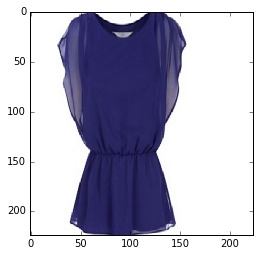

Metodo aplicado -> tf.image.flip_left_right()


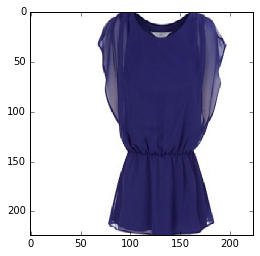

Metodo aplicado -> tf.image.flip_up_down()


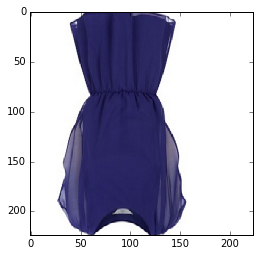

Metodo aplicado -> tf.image.transpose_image()


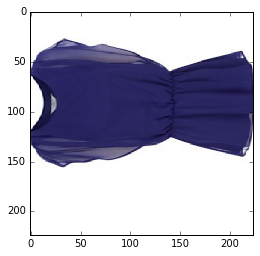

IMAGEN # 2/3
IMAGEN ORIGINAL


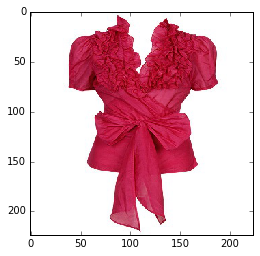

Metodo aplicado -> tf.image.flip_left_right()


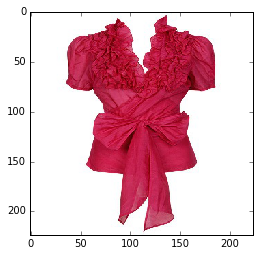

Metodo aplicado -> tf.image.flip_up_down()


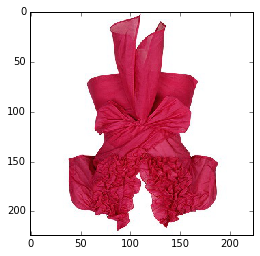

Metodo aplicado -> tf.image.transpose_image()


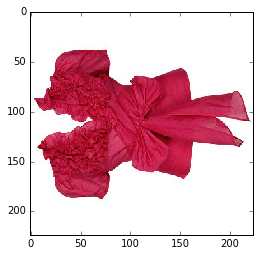

IMAGEN # 3/3
IMAGEN ORIGINAL


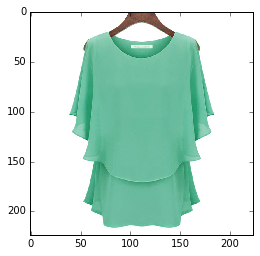

Metodo aplicado -> tf.image.flip_left_right()


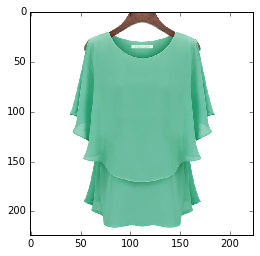

Metodo aplicado -> tf.image.flip_up_down()


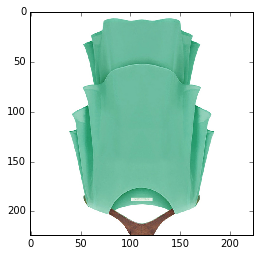

Metodo aplicado -> tf.image.transpose_image()


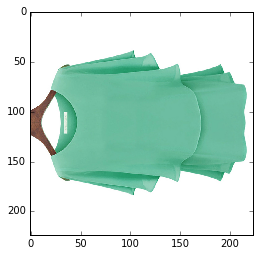

In [10]:
def voltear_imagen_segun_indicado(imagenes, cantidad):
    listadoDeImagenes = []
    tf.reset_default_graph()
    imagen = tf.placeholder(tf.float32, shape = (IMAGE_SIZE, IMAGE_SIZE, 3))
    tensorImagen = [tf.image.flip_left_right(imagen),tf.image.flip_up_down(imagen),tf.image.transpose_image(imagen)]
    tensorNombreMetodo = ['tf.image.flip_left_right()','tf.image.flip_up_down()','tf.image.transpose_image()']
    
    for contador in range(cantidad):
        print('IMAGEN # '+str(contador+1)+'/'+str(cantidad))
        print('IMAGEN ORIGINAL')
        print('=====================================================================')
        plt.imshow(imagenes[contador])
        plt.show()
        print('=====================================================================')
        i=0
        for iterar_imagen in range(cantidad):
            i=i+1
            with tf.Session() as sess:
            # Las Sesiones deben ser cerradas para liberar los recursos, por lo que es una buena práctica incluir.
            # la Sesión dentro de un bloque "with" que la cierra automáticamente cuando el bloque termina de ejecutar.
                sess.run(tf.global_variables_initializer()) # esta funcion inicializa todas las variables
                print("Metodo aplicado -> "+str(tensorNombreMetodo[iterar_imagen]))
                flipped_imgs = sess.run(tensorImagen[iterar_imagen], feed_dict = {imagen: imagenes[contador]}) # ejecutamos el tensor
                #listadoDeImagenes.extend(flipped_imgs) # agregándole todos los ítems de la lista dada flipped_imgs
                plt.imshow(flipped_imgs)
                plt.savefig('DESTINO/Flipping/MyNewImage'+str(i)+'.png')
                plt.show()
                
        #listadoDeImagenes = np.array(listadoDeImagenes, dtype = np.float32)
    return listadoDeImagenes

flipped_images = voltear_imagen_segun_indicado(X_imgs,3)        

In [6]:
#for imagen in X_imgs:
#    imgplot = plt.imshow(imagen)
#    plt.show()
    
#for image in flipped_images: 
#    print type(image)
#    plt.imshow(image)
#    plt.show()